<a href="https://colab.research.google.com/github/jfgesis/Limpieza_de_Datos/blob/main/LimpiezaDatos_VideoJuegos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Columnas del dataset de los video juegos



*   Rank: Posición del videojueo en una categoria en particular.
*   Title: Nombre del videojuego.
*   Total ratings: Número total de calificaciones.
*   Installs: Número de instalaciones apróximado.
*   Average rating: Calificación promedio hasta 5.
*   Growth (30 days): Crecimiento porcentual en 30 días.
*   Growth (60 days): Crecimiento porcentual en 60 días.
*   Price: Precio en dolares.
*   ECategory: Categoría del videojuego.
*   5 star ratings: Número de calificaciones de 5 estrellas.
*   4 star ratings: Número de calificaciones de 4 estrellas.
*   3 star ratings: Número de calificaciones de 3 estrellas.
*   2 star ratings: Número de calificaciones de 2 estrellas.
*   1 star ratings: Número de calificaciones de 1 estrella.
*   Paid: Es un videojuego pago (True) o gratis (False).

In [1]:
#Procesamiento
import pandas as pd
import numpy as np
import datetime as dt
import missingno as msno

#Visualización
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [2]:
from google.colab import files

# Sube el archivo desde tu PC
uploaded = files.upload()


Saving android-games.csv to android-games.csv


In [3]:
android_games = pd.read_csv('android-games.csv')

In [4]:
android_games.head()

,Date,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
0,1/1/2020,1,Garena Free Fire- World Series,86273129,500.0 M,4.0,2.1,6.9,0.0,GAME ACTION,63546766,4949507,3158756,2122183,12495915,False
1,1/2/2020,2,PUBG MOBILE - Traverse,37276732,500.0 M,4.0,1.8,3.6,0.0,GAME ACTION,28339753,2164478,1253185,809821,4709492,False
2,1/3/2020,3,Mobile Legends: Bang Bang,26663595,100.0 M,4.0,1.5,3.2,0.0,GAME ACTION,18777988,1812094,1050600,713912,4308998,False
3,1/4/2020,4,Brawl Stars,17971552,100.0 M,4.0,1.4,4.4,0.0,GAME ACTION,13018610,1552950,774012,406184,2219794,False
4,1/5/2020,5,Sniper 3D: Fun Free Online FPS Shooting Game,14464235,500.0 M,4.0,0.8,1.5,0.0,GAME ACTION,9827328,2124154,1047741,380670,1084340,False


In [5]:
android_games.describe()

,rank,total ratings,average rating,growth (30 days),growth (60 days),price,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings
count,1736.000000,1.736000e+03,1728.00000,1736.000000,1736.000000,1736.000000,1.736000e+03,1.736000e+03,1.736000e+03,1.736000e+03,1.736000e+03
mean,50.220046,1.110679e+06,3.90625,320.626187,122.139113,0.010904,7.964405e+05,1.189283e+05,5.870517e+04,2.824129e+04,1.083608e+05
std,29.025100,3.988018e+06,0.29551,6008.527713,2250.002200,0.214616,2.948668e+06,3.232236e+05,1.668288e+05,9.569178e+04,5.046927e+05
min,1.000000,3.299300e+04,2.00000,0.000000,0.000000,0.000000,1.397500e+04,2.451000e+03,7.180000e+02,2.660000e+02,5.450000e+02
25%,25.000000,1.742272e+05,4.00000,0.100000,0.200000,0.000000,1.268265e+05,2.056625e+04,9.609000e+03,4.235000e+03,1.265300e+04
50%,50.000000,4.276935e+05,4.00000,0.500000,1.000000,0.000000,2.957355e+05,5.085100e+04,2.494450e+04,1.061450e+04,3.359650e+04
75%,75.000000,8.837410e+05,4.00000,1.700000,3.300000,0.000000,6.184412e+05,1.016020e+05,5.208700e+04,2.320825e+04,8.010575e+04
max,100.000000,8.627313e+07,4.00000,227105.700000,69441.400000,7.490000,6.354677e+07,5.404966e+06,3.158756e+06,2.122183e+06,1.249592e+07


In [6]:

android_games.sample(4)
#MUESTRA ALEATORIA

,Date,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
117,1/18/2020,18,Murder in the Alps,822854,10.0 M,4.0,1.0,2.2,0.0,GAME ADVENTURE,499384,155809,79328,34103,54228,False
47,2/17/2020,48,Block Strike,1607897,10.0 M,4.0,0.2,0.5,0.0,GAME ACTION,1036342,184035,107587,53758,226173,False
1547,1/22/2020,22,Guess The Brand - Logo Mania,181338,10.0 M,4.0,0.0,0.0,0.0,GAME TRIVIA,118311,29600,14815,4971,13639,False
1093,3/8/2020,68,Hill Climb Racing 2,386128,100.0 M,4.0,0.2,0.4,0.0,GAME RACING,271644,62888,20719,7568,23306,False


In [7]:

android_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1736 entries, 0 to 1735
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              1736 non-null   object 
 1   rank              1736 non-null   int64  
 2   title             1736 non-null   object 
 3   total ratings     1736 non-null   int64  
 4   installs          1736 non-null   object 
 5   average rating    1728 non-null   float64
 6   growth (30 days)  1736 non-null   float64
 7   growth (60 days)  1736 non-null   float64
 8   price             1736 non-null   float64
 9   category          1736 non-null   object 
 10  5 star ratings    1736 non-null   int64  
 11  4 star ratings    1736 non-null   int64  
 12  3 star ratings    1736 non-null   int64  
 13  2 star ratings    1736 non-null   int64  
 14  1 star ratings    1736 non-null   int64  
 15  paid              1729 non-null   object 
dtypes: float64(4), int64(7), object(5)
memory 

Podemos observar valores nulos en las variables paid y average rating.

El tipo de dato de la fecha es Object así como el de la variable installs.

In [11]:
android_games.describe().T

,count,mean,std,min,25%,50%,75%,max
rank,1736.0,5.022005e+01,2.902510e+01,1.0,25.00,50.0,75.00,100.00
total ratings,1736.0,1.110679e+06,3.988018e+06,32993.0,174227.25,427693.5,883741.00,86273129.00
average rating,1728.0,3.906250e+00,2.955102e-01,2.0,4.00,4.0,4.00,4.00
growth (30 days),1736.0,3.206262e+02,6.008528e+03,0.0,0.10,0.5,1.70,227105.70
growth (60 days),1736.0,1.221391e+02,2.250002e+03,0.0,0.20,1.0,3.30,69441.40
price,1736.0,1.090438e-02,2.146162e-01,0.0,0.00,0.0,0.00,7.49
5 star ratings,1736.0,7.964405e+05,2.948668e+06,13975.0,126826.50,295735.5,618441.25,63546766.00
4 star ratings,1736.0,1.189283e+05,3.232236e+05,2451.0,20566.25,50851.0,101602.00,5404966.00
3 star ratings,1736.0,5.870517e+04,1.668288e+05,718.0,9609.00,24944.5,52087.00,3158756.00
2 star ratings,1736.0,2.824129e+04,9.569178e+04,266.0,4235.00,10614.5,23208.25,2122183.00


En las variables growth (30 days) y growth (60 days) se observa el valor máximo en una escala superior a los demás valores.

# Visualizaciones

Distribución del promedio de calificaciones:

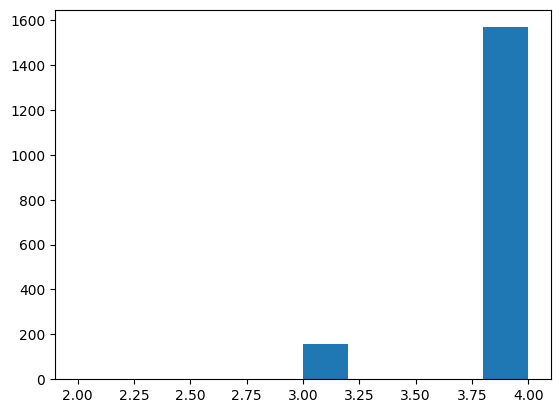

In [12]:
#Matplotlib
plt.hist(android_games['average rating']);

La mayoría de los juegos que entran en el top 100 por categoría reciben una calificación promedio de 4 estrellas.

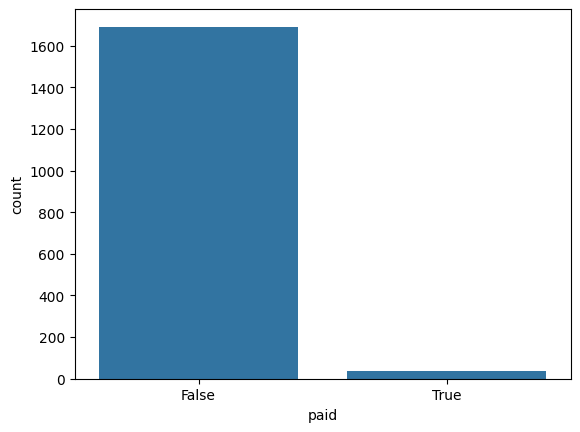

In [13]:
#Seaborn
sns.countplot(x='paid',data=android_games);

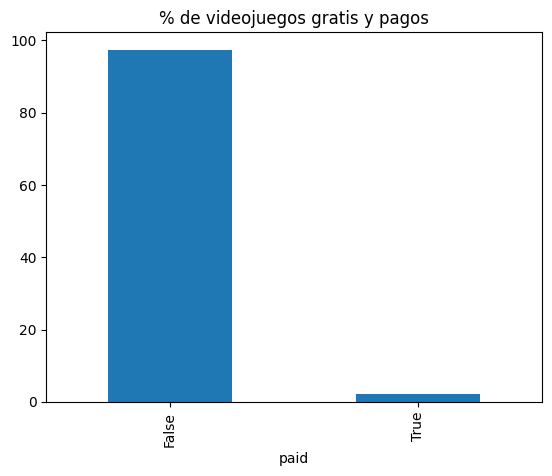

In [14]:
plot = (100 * android_games['paid'].value_counts() / len(android_games['paid'])).plot(
kind='bar', title='% de videojuegos gratis y pagos')

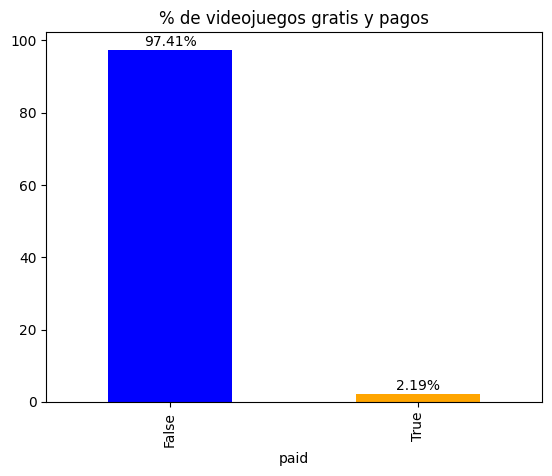

In [16]:
# Calcular el porcentaje de videojuegos gratis y pagos
percentages = 100 * android_games['paid'].value_counts() / len(android_games['paid'])

# Definir colores para las barras
colors = ['blue', 'orange']

# Crear el gráfico de barras con colores
plot = percentages.plot(kind='bar', title='% de videojuegos gratis y pagos', color=colors)

# Agregar los valores en las barras
for i, percentage in enumerate(percentages):
    plt.text(i, percentage + 1, f'{percentage:.2f}%', ha='center')

# Mostrar el gráfico
plt.show()


In [17]:

# Plotly
fig = go.Figure()
fig.add_trace(go.Box(y=android_games['growth (30 days)']))
fig.add_trace(go.Box(y=android_games['growth (60 days)']))

fig.show()

# Descriptivas

Descripción de variables categóricas:

In [19]:
android_games.describe(include='O').T

,count,unique,top,freq
Date,1736,121,1/3/2020,21
title,1736,1681,Solitaire,36
installs,1736,9,10.0 M,806
category,1736,22,GAME CARD,125
paid,1729,2,False,1691


Para la fecha podemos observar 121 datos únicos, pero si cada puesto se registró en un día del año este valor debería ser 100.

El videojuego que aparece más veces en el top es Solitaire.

La variable installs es categórica.


In [20]:
#Valores únicos de las Categorías:
android_games['category'].unique()

array(['GAME ACTION', 'game action', 'GAME ADVENTURE', 'GAME ARCADE',
       'GAME BOARD', 'GAME CARD', 'game card', 'GAME CASINO',
       'GAME CASUAL', 'GAME EDUCATIONAL', 'GAME MUSIC', 'game music',
       'GAME PUZZLE', 'GAME RACING', 'GAME ROLE PLAYING',
       'GAME SIMULATION', 'GAME SPORTS', 'GAME STRATEGY', 'GAME TRIVIA',
       'GAME WORD', 'FICTION BOOK', 'BIOGRAPHY BOOK'], dtype=object)

Se obser valores con mayúscula y minúscula

In [21]:
android_games['Date'].unique()

array(['1/1/2020', '1/2/2020', '1/3/2020', '1/4/2020', '1/5/2020',
       '1/6/2020', '1/7/2020', '1/8/2020', '1/9/2020', '1/10/2020',
       '1/11/2020', '1/12/2020', '1/13/2020', '1/14/2020', '1/15/2020',
       '1/16/2020', '1/17/2020', '1/18/2020', '1/19/2020', '1/20/2020',
       '1/21/2020', '1/22/2020', '1/23/2020', '1/24/2020', '1/25/2020',
       '1/26/2020', '1/27/2020', '1/28/2020', '1/29/2020', '1/30/2020',
       '1/31/2020', '2/1/2020', '2/2/2020', '2/3/2020', '2/4/2020',
       '2/5/2020', '2/6/2020', '2/7/2020', '2/8/2020', '2/9/2020',
       '2/10/2020', '2/11/2020', '2/12/2020', '2/13/2020', '2/14/2020',
       '2/15/2020', '2/16/2020', '2/17/2020', '2/18/2020', '2/19/2020',
       '2/20/2020', '2/21/2020', '2/22/2020', '2/23/2020', '2/24/2020',
       '2/25/2020', '2/26/2020', '2/27/2020', '2/28/2020', '2/29/2020',
       '3/1/2020', '3/2/2020', '3/3/2020', '3/4/2020', '3/5/2020',
       '3/6/2020', '3/7/2020', '3/8/2020', '3/9/2020', '3/10/2020',
       '3/11/2020',

se observan dos formatos totalmente distintos